#### Exercício Resposta

Dado o seguinte conjunto de dados 

    Id,Feature1,Feature2
    1,2.5,3.5
    2,1.8,2.0
    3,3.0,3.2
    4,1.5,2.8
    5,2.0,3.0
    6,4.0,4.5
    7,3.5,4.0
    8,4.2,3.8
    9,4.5,4.0
    10,3.7,3.5

- Coloque esses dados dentro de um Dataframe do Pandas e salve em um arquivo CSV (Dica: Use dicionário no python e desconsidere a coluna ID)

- Após a análise exploratória, use o método do Cotovelo para definir a quantidade de Clusters

- Treine o Modelo e o valide usando o método da Silhueta (Não é necessário plotar o gráfico final se não quiser)


#### Bibliotecas

In [1]:
'''
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
'''

### Análise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Criação do modelo
from sklearn.cluster import KMeans

### Avaliação de métricas
from sklearn.metrics import calinski_harabasz_score, silhouette_score


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


#### Leitura de Dados

In [2]:
# Dados
data = {
    'Id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature1': [2.5, 1.8, 3.0, 1.5, 2.0, 4.0, 3.5, 4.2, 4.5, 3.7],
    'Feature2': [3.5, 2.0, 3.2, 2.8, 3.0, 4.5, 4.0, 3.8, 4.0, 3.5]
}

# Criando DataFrame
df = pd.DataFrame(data)

# Salvando em um arquivo CSV
df.to_csv('dados.csv', index=False)

#### Análise exploratória

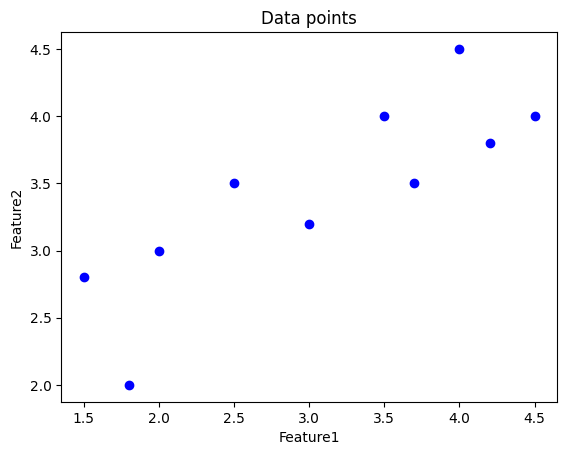

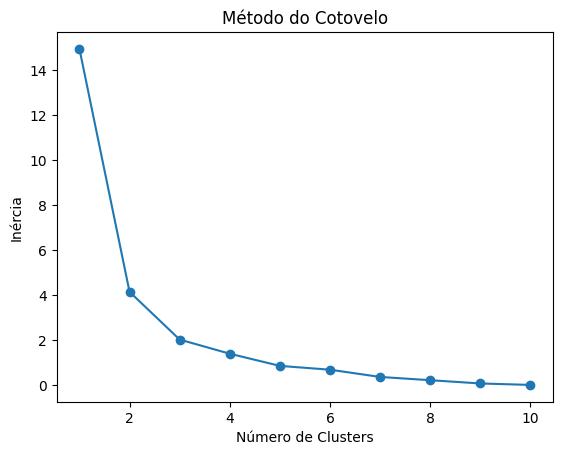

In [3]:
# Carregando os dados
df = pd.read_csv('dados.csv')

# Removendo a coluna 'Id'
X = df.drop(columns=['Id'])

# Lista para armazenar os valores de inércia
inertia = []

# Testando diferentes números de clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


# Plotando o gráfico
plt.scatter(x = df['Feature1'], y = df['Feature2'], color = "blue")
plt.title("Data points")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()

# Plotando o método do cotovelo
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()


#### Definição de modelo e treino

In [4]:
# Escolhendo o número ótimo de clusters (n_clusters=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

print(kmeans.labels_)

[2 0 2 0 0 1 1 1 1 1]


#### Avaliando modelos

Coeficiente de Silhueta médio: 0.43237513088963453


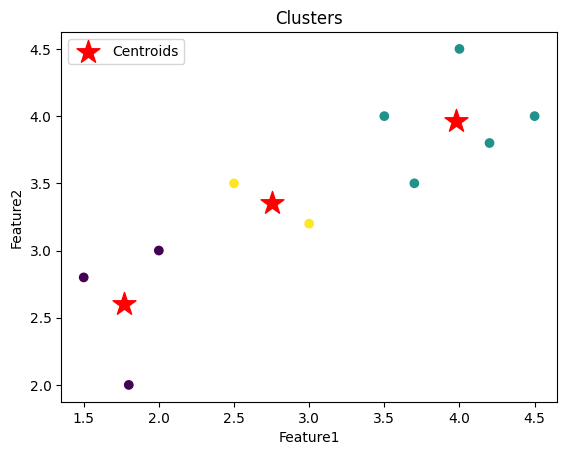

In [5]:
# Adicionando os rótulos ao DataFrame
df['Cluster'] = kmeans.labels_

# Calculando o coeficiente de Silhueta
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f'Coeficiente de Silhueta médio: {silhouette_avg}')

# Visualizando os clusters
plt.scatter(df['Feature1'], df['Feature2'], c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.title('Clusters')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()